<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.3 Modelos compartimentales </h3>
<h3 style="text-align: center;"> Modelo SIR: Ejercicios</h3>

Este modelo representa la evolución de una epidemia que se expande en una población fija. Evaluaremos la efectividad de diversas intervenciones. 

## El modelo Kermack-McKendrick

El modelo denominado *SIR* se aplica a una población finita de individuos, que desarrollan una enfermedad de la cual se pueden recuperar de forma natural tras un tiempo de desarrollo de la enfermedad. Este el caso de enfermedades comunes, como la gripe estacional. Tenemos tres tipos de individuos:

-   *S*: Personas "susceptibles", o sea, aquellas que pueden contraer la enfermedad si entran en contacto con un infectado.

-   *I*: Personas "infectadas", o sea, aquellas que sufren la enfermedad y pueden pasar la enfermedad a un susceptible si entran en contacto con él. 

-   *R*: Personas "recuperadas", personas que han pasado la enfermedad y que no la van a tener nuevamente.  

Supóngase una población fija de $N$ individuos, de los cuales tenemos una fracción $s$, $i$ y $r$ de susceptibles, infectados y recuperados, respectivamente. Entonces $s+i+r=1$. 

Veamos cómo evolucionan estas variables. Supóngase que un individuo susceptible necesita en media $T_s$ días para entrar en contacto con toda la población. Entonces podemos asumir que cada día entra en contacto con $\beta_s N=1/T_s N$ individuos, de los cuales una fracción $i$ están infectados. Entonces, dado que $sN$ es el número de individuos susceptibles, el número de contactos de esos individuos con infectados cada día es de $\beta_s N i sN$. Si la probabilidad de ser infectado por cada contacto es $\beta_i$, entonces el número de nuevos infectados cada día es de $\beta_i \beta_s N i sN$.

¿Cómo se recuperan los infectados? Si el número de días de recuperacion es de $T_r$, entonces podemos asumir que cada día se recuperan $\gamma=1/T_r$ individuos. Por tanto, el total de individuos que se recuperan cada día es de $\gamma i N$.

Por tanto:

-   El número de nuevos infectados cada día es $\beta_i \beta_s N i sN$. Dividiendo por el número total de individuos $N$, tenemos que la fracción diaria de infectados cada día es de $\beta_i \beta_s N i s$. Por simplicidad en la notación, definimso $\beta= \beta_i \beta_s N$, por lo que la tasa de nuevos infectados cada día es $\beta s i$.

-   El número de individuos que se recuperan cada día es de $\gamma i N$. Dividiendo por el total de individuos $N$ tenemos que la tasa de recuperaciones cada día es de $\gamma i$.

Las siguientes ecuaciones determinan la evolución de la tasa de susceptibles, infectados y recuperados cada día: 


$$\begin{aligned}
\frac{ds}{dt} &= -\beta s i \\
\frac{di}{dt} &= \beta s i - \gamma i\\
\frac{dr}{dt} &= \gamma i\end{aligned}$$ 


**(a)** Simular el modelo asumiendo unas condiciones iniciales y parámetros dados. 

**(b)** El parámetro $\beta$ se refiere a la tasa de contactos entre infectados y susceptibles, por lo que actuar sobre él indica la implementación de medidas de alejamiento entre los individuos, como cuarentenas, etc. El parámetro $\gamma$ se refiere a la tasa de recuperación diaria, por lo que actuar sobre él indica medidas de acortamiento del proceso patológico.

Estudiar las sensibilidad de los parámetros ($\beta$ y $\gamma$) sobre el número máximo de infectados durante la epidemia, dadas las condiciones iniciales y valores de los parámetros determinadas anteriormente.

**(c)** Representar el número acumulado final de infectados (variable recuperados) en función de los parámetros $\beta$ y $\gamma$ representar en la misma gráfica distintos valores de $\beta$ y $\gamma$ (por medio de la representación de diversas curvas o por medio de un **heatmap**).  

**(d)** Estudiar la evolución de la enfermedad cuando se implementa una medida de inmunización. Esta medida asume que una parte de la población susceptible se extrae cada día en una nueva variable de estado llamada *inmunizados*. Estudiar el efecto de la tasa diaria de inmunización sobre el total de infectados por la enfermedad. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm


In [2]:
def sir_model(beta, gamma):
    def f(x, *_):
        s = x[0]
        i = x[1]
        ds = -beta*s*i
        di = beta*s*i-gamma*i
        dr = gamma*i
        return np.array([ds,di,dr])
    return f


In [3]:
def solve_rk(model, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i]
        k1 = model(x[i], t[i])
        k2 = model(x[i]+dt*k1/2, t[i]+dt/2)
        k3 = model(x[i]+dt*k2/2, t[i]+dt/2)
        k4 = model(x[i]+dt*k3, t[i]+dt)
        x[i+1] = x[i] + dt/6 * (k1+2*k2+2*k3+k4) 
    return x

In [ ]:
beta = 0.5
gamma = 0.4

initial = 1e-5

x0 = np.array([1-initial, initial, 0])

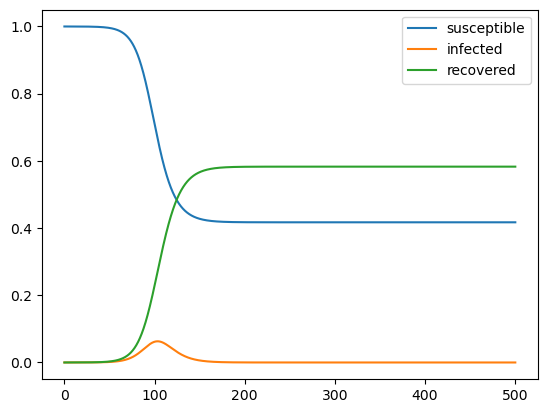

In [22]:
t = np.linspace(0, 500, 2001)

x = solve_rk(sir_model(beta, gamma), x0, t)

lines = plt.plot(t, x)
plt.legend(lines, ["susceptible", "infected", "recovered"])
plt.show()

In [31]:
space = np.linspace(0, 1, 101)

with tqdm(total=101*2) as pbar:
    beta_var = np.zeros((101, 2))
    for i, beta_prime in enumerate(space):
        x = solve_rk(sir_model(beta_prime, gamma), x0, t)
        beta_var[i, 0] = x[:,1].max()
        beta_var[i, 1] = x[-1,2]
        pbar.update(1)
    gamma_var = np.zeros((101, 2))
    for i, gamma_prime in enumerate(space):
        x = solve_rk(sir_model(beta, gamma_prime), x0, t)
        gamma_var[i, 0] = x[:,1].max()
        gamma_var[i, 1] = x[-1,2]
        pbar.update(1)

  0%|          | 0/202 [00:00<?, ?it/s]

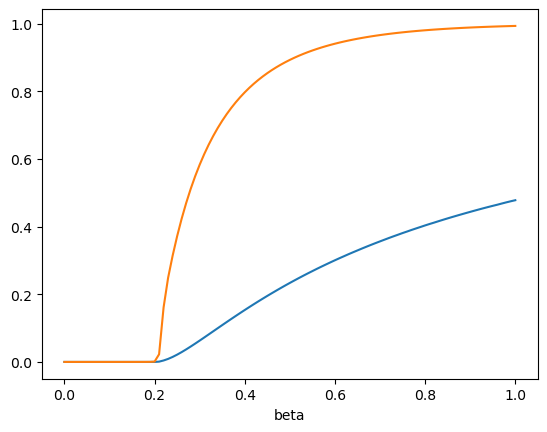

In [32]:
plt.plot(space, beta_var)
plt.xlabel("beta")
plt.show()

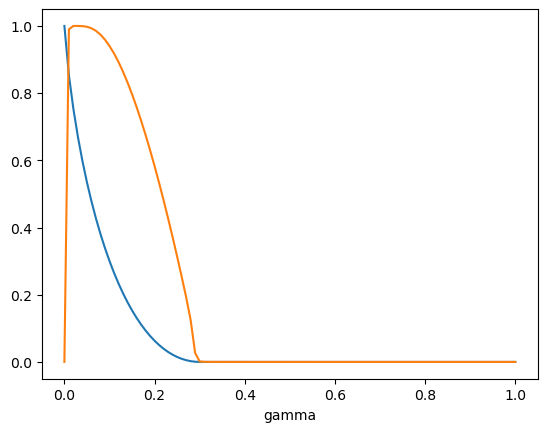

In [33]:
plt.plot(space, gamma_var)
plt.xlabel("gamma")
plt.show()

In [35]:
betas = np.linspace(0, 0.5, 26)
gammas = np.linspace(0, 0.5, 21)

grid = np.zeros((len(betas), len(gammas)))

with tqdm(total=len(betas)*len(gammas)) as pbar:
    for i, beta in enumerate(betas):
        for j, gamma in enumerate(gammas):
            x = solve_rk(sir_model(beta, gamma), x0, t)
            final_infected = x[-1,2]
            grid[i, j] = final_infected
            pbar.update()

  0%|          | 0/546 [00:00<?, ?it/s]

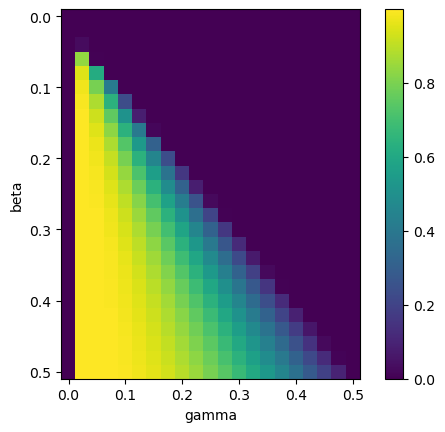

In [43]:
plt.imshow(grid)
plt.xlabel("gamma")
plt.ylabel("beta")
plt.xticks(range(0, 21, 4), [f"{x:.3}" for x in gammas[::4]])
plt.yticks(range(0, 26, 5), betas[::5])
plt.colorbar()
plt.show()

In [51]:
def sirv_model(beta, gamma, delta):
    def f(x, *_):
        s = x[0]
        i = x[1]
        ds = -beta*s*i -delta*s
        di = beta*s*i - gamma*i
        dr = gamma*i
        dv = delta*s
        return np.array([ds,di,dr,dv])
    return f

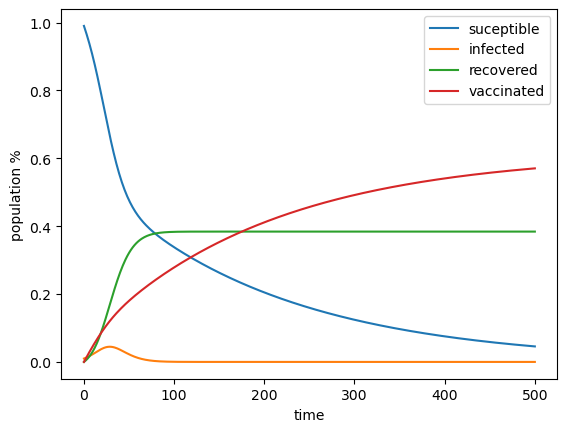

In [68]:
beta = 0.3
gamma = 0.2
delta = 0.005

initial = 1e-2

x0 = np.array([1-initial, initial, 0, 0])
t = np.linspace(0, 500, 501)

x = solve_rk(sirv_model(beta, gamma, delta), x0, t)

plt.plot(t, x, label=["suceptible", "infected", "recovered", "vaccinated"])
plt.xlabel("time")
plt.ylabel("population %")
plt.legend()
plt.show()

In [79]:
deltas = np.linspace(0, 0.3, 101)**2

infected = np.zeros(101)
vaccinated = np.zeros(101)
for i, delta in tqdm(enumerate(deltas), total=101):
    x = solve_rk(sirv_model(beta, gamma, delta), x0, t)
    infected[i] = x[-1,2]
    vaccinated[i] = x[-1,3]

  0%|          | 0/101 [00:00<?, ?it/s]

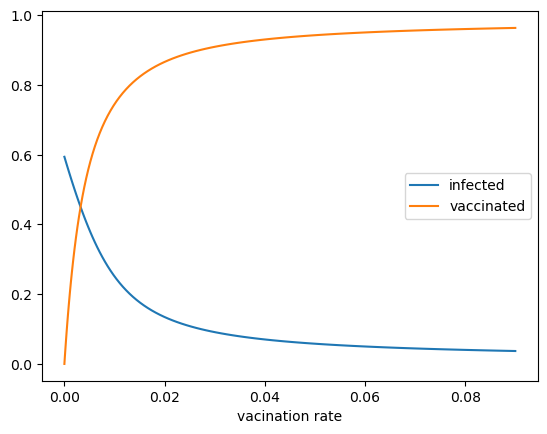

In [80]:
plt.plot(deltas, infected, label="infected")
plt.plot(deltas, vaccinated, label="vaccinated")
plt.xlabel("vacination rate")
plt.legend()
plt.show()